Solving the system of differential equations:
$$
\frac{d^2\mathbf{x}}{dt^2}=k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & -(1/m_1+1/m_2)\\
\end{bmatrix}\mathbf{x}
$$
gives
$$
\mathbf{x} = exp(t\sqrt{\mathbf{A}})\\
\mathbf{x} = cosh(t\sqrt{\mathbf{A}})\\
\mathbf{x} = sinh(t\sqrt{\mathbf{A}})
$$
where:
$$
\mathbf{A} = k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & -(1/m_1+1/m_2)\\
\end{bmatrix}
$$

In [1]:
using Plots, FFTW

m₁ = 1
m₂ = 10
k = 1

A = k * [-1/m₁ 1/m₁; 1/m₁ (-1/m₂ - 1/m₁)]

t = range(0, 50, length=500)

x₁_init = -1
x₂_init = -1

initial = [x₁_init;x₂_init]

x = [exp(i * sqrt(A)) * initial for i ∈ t]

x₁ = [real(i[1]) for i ∈ x]
x₂ = [real(i[2]) for i ∈ x]

500-element Vector{Float64}:
 -1.0
 -0.9994984556918272
 -0.9979993483777196
 -0.9955191436277151
 -0.9920849154742234
 -0.9877338014906768
 -0.9825122556436499
 -0.9764751142713928
 -0.9696844943814633
 -0.9622085469052917
  ⋮
  0.12333783589544423
  0.10556786758773078
  0.08778701245974109
  0.06993032609222896
  0.051933576856330044
  0.03373477760609361
  0.015275671536234714
 -0.0034968584463259678
 -0.02262948591700009

The following code plots the solution to the differential equations

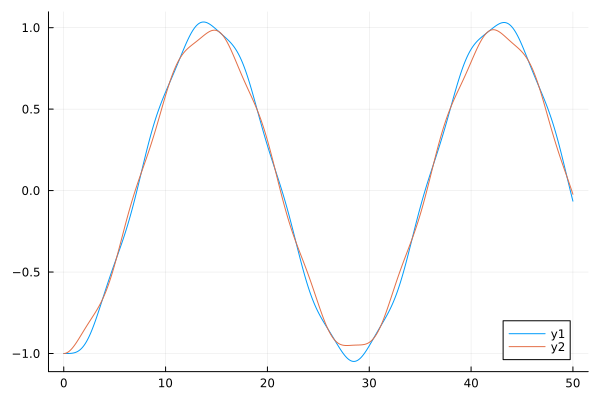

In [2]:
plot(t, [x₁, x₂])

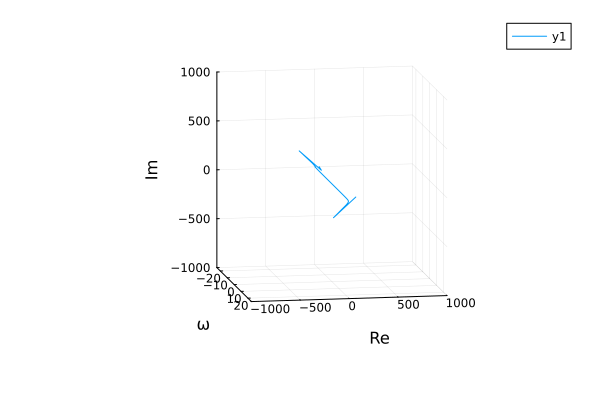

In [7]:
fft_x1 = fft(x₁)
fft_x2 = fft(x₂)

mag_fft_x1 = [abs(i) for i in fft_x1]
mag_fft_x2 = [abs(i) for i in fft_x2]

arg_fft_x1 = [angle(i) for i in fft_x1]
arg_fft_x2 = [angle(i) for i in fft_x2]

re_fft_x1 = [real(i) for i in fft_x1]
re_fft_x2 = [real(i) for i in fft_x2]

im_fft_x1 = [imag(i) for i in fft_x1]
im_fft_x2 = [imag(i) for i in fft_x2]

plot(
    [i-25 for i in t],
    [re_fft_x1], 
    [im_fft_x1], 
    xlabel="ω", 
    ylabel="Re", 
    zlabel="Im", 
    st=:line,
    xlims=(-25,25),
    ylims=(-1000,1000),
    zlims=(-1000,1000),
    camera=(80,10),
)